In [92]:
# Dependencies - - MAY NEED TO FIGURE OUT WHICH ARE NOT NEEDED, BUT DONT THINK IT'LL BE AN ISSUE IF LEFT THERE
import gzip
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from datetime import date
import datetime
import calendar
import holidays
from pprint import pprint
import calmap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [93]:
# Import Data
data_df = pd.read_csv('calendar.csv.gz', nrows=100000, compression='gzip', error_bad_lines=False)
# Set Display Options
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)
pd.set_option('display.width', 100000)

In [94]:
# Current Value Formats
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
listing_id    100000 non-null int64
date          100000 non-null object
available     100000 non-null object
price         40568 non-null object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [95]:
# Reformat Values
data_df=data_df.dropna()
data_df['price'] = data_df['price'].map(lambda x: x.lstrip('$'))
data_df['price'] = data_df['price'].str.replace(',', '')
data_df['year'] = data_df['date'].str[0:4]
data_df['month'] = data_df['date'].str[5:7]
data_df['day'] = data_df['date'].str[8:10]
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['price'] = pd.to_numeric(data_df['price'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40568 entries, 365 to 99999
Data columns (total 7 columns):
listing_id    40568 non-null int64
date          40568 non-null datetime64[ns]
available     40568 non-null object
price         40568 non-null float64
year          40568 non-null object
month         40568 non-null object
day           40568 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.5+ MB


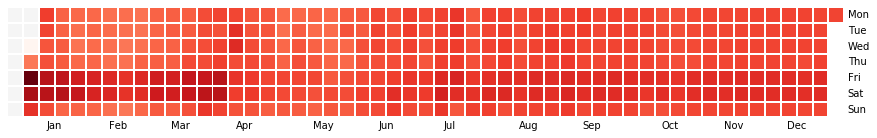

In [96]:
# Grouping by date for Calendar Heatmap
data_df_grouped = data_df.groupby('date').agg({'price':'mean'})
heatmap = pd.Series(data_df_grouped['price'], index=data_df_grouped.index)
# Plot Calendar Heatmap
f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(heatmap, year=2018, ax=ax)

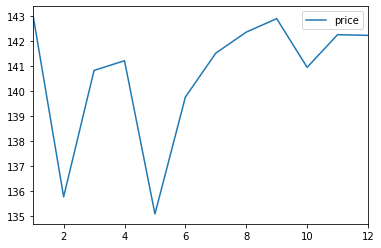

In [98]:
# Monthly Price Averages - I DID THIS DIFFERENTLY FROM BAR CHARTS BELOW. DOES NOT LOOK RIGHT. WILL REDO
data_df_avg = data_df.groupby(['month'], as_index=False)['price'].mean()
data_df_avg.index = data_df_avg.index+1
data_df_avg.plot()

In [99]:
# ID Day of Week and Holidays
us_holidays = holidays.US()
data_df['dayofweek']='default'
data_df['holiday']='False'
data_df['holiday_name']='working'
for index,row in data_df.iterrows():
    sdate = datetime.date(int(row['year']),int(row['month']),int(row['day']))
    vall=date(int(row['year']),int(row['month']),int(row['day'])) in us_holidays
    data_df.set_value(index,'dayofweek', calendar.day_name[sdate.weekday()])
    data_df.set_value(index,'holiday',vall)
    data_df.set_value(index,'holiday_name',us_holidays.get(sdate))

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [100]:
# Calc Avg Prices for DoW
DoW_df=data_df.groupby('dayofweek').price.mean()
DoW_df=DoW_df.reset_index()
DoW_df['day#']=0

for index,row in DoW_df.iterrows():
    if row['dayofweek']=='Monday':
        DoW_df.set_value(index,'day#',1)
    if row['dayofweek']=='Tuesday':
        DoW_df.set_value(index,'day#',2)
    if row['dayofweek']=='Wednesday':
        DoW_df.set_value(index,'day#',3)
    if row['dayofweek']=='Thursday':
        DoW_df.set_value(index,'day#',4)
    if row['dayofweek']=='Friday':
        DoW_df.set_value(index,'day#',5)
    if row['dayofweek']=='Saturday':
        DoW_df.set_value(index,'day#',6)
    if row['dayofweek']=='Sunday':
        DoW_df.set_value(index,'day#',7)
DoW_df=DoW_df.sort_values('day#',ascending=[1])
DoW_df=DoW_df.rename(columns={'price':'Average_Price'})

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Day Of Week')]

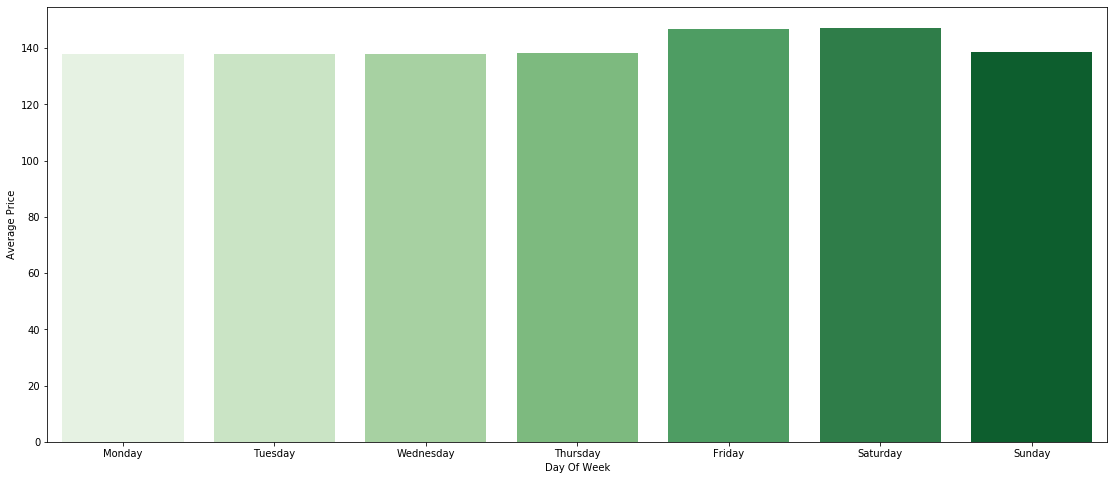

In [101]:
# Day of Week Prices
plt.figure(figsize=(19,8))
ax = sns.barplot("dayofweek", y="Average_Price", data=DoW_df,palette="Greens")
ax.set(xlabel='Day Of Week', ylabel='Average Price')

In [102]:
# Calc Avg Prices for Holidays
Hol_df=data_df.groupby('holiday_name').price.mean()
Hol_df=Hol_df.reset_index()
Hol_df['hol#']=0

for index,row in Hol_df.iterrows():
    if row['holiday_name']=="New Year's Day":
        Hol_df.set_value(index,'hol#',0)
    if row['holiday_name']=='Martin Luther King, Jr. Day':
        Hol_df.set_value(index,'hol#',1)
    if row['holiday_name']=="Washington's Birthday":
        Hol_df.set_value(index,'hol#',2)
    if row['holiday_name']=='Memorial Day':
        Hol_df.set_value(index,'hol#',3)
    if row['holiday_name']=='Independence Day':
        Hol_df.set_value(index,'hol#',4)
    if row['holiday_name']=='Labor Day':
        Hol_df.set_value(index,'hol#',5)
    if row['holiday_name']=='Columbus Day':
        Hol_df.set_value(index,'hol#',6)
    if row['holiday_name']=='Veterans Day':
        Hol_df.set_value(index,'hol#',7)
    if row['holiday_name']=="Veterans Day (Observed)":
        Hol_df.set_value(index,'hol#',8)
    if row['holiday_name']=='Thanksgiving':
        Hol_df.set_value(index,'hol#',9)
    if row['holiday_name']=='Christmas Day':
        Hol_df.set_value(index,'hol#',10)
Hol_df=Hol_df.sort_values('hol#',ascending=[1])
Hol_df=Hol_df.rename(columns={'price':'Average_Price'})
Hol_df.head()

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

,holiday_name,Average_Price,hol#
6,New Year's Day,142.300885,0
4,"Martin Luther King, Jr. Day",142.291667,1
10,Washington's Birthday,130.672131,2
5,Memorial Day,135.162393,3
2,Independence Day,137.876033,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

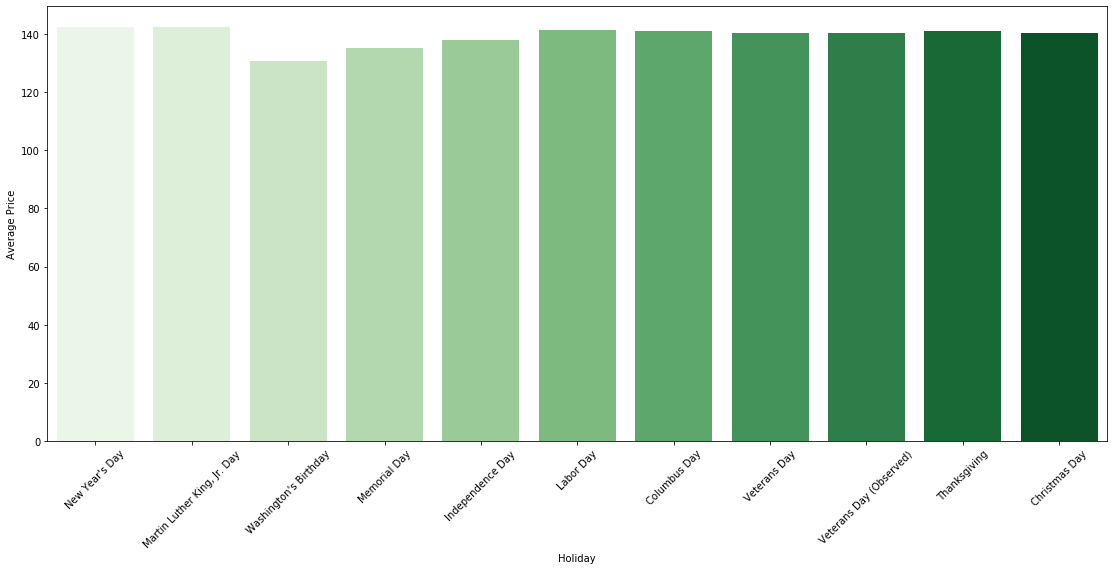

In [103]:
# Holiday Prices
plt.figure(figsize=(19,8))
ax = sns.barplot("holiday_name", y="Average_Price", data=Hol_df,palette="Greens")
ax.set(xlabel='Holiday', ylabel='Average Price')
plt.xticks(rotation=45)

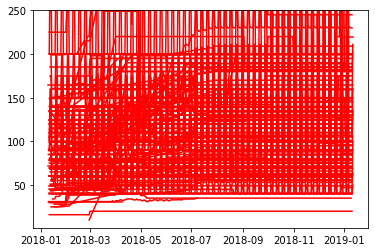

In [104]:
# THIS DOES NOT WORK UNLESS NORMALIZED AND HAVENT FIGURED IT OUT SO FAR. PROBABLY HAVE ENOUGH CHARTS WITHOUT IT?
# Create array of unique Listing IDs
listings = data_df["listing_id"].unique()
# Normalization
#normalized_df=(data_df-data_df.mean())/data_df.std()
# Plotting all but UNnormalized
for x in listings:
    data_df1 = data_df[data_df['listing_id'] == x]
    plt.plot(data_df1["date"],data_df1["price"],c="red")
    plt.ylim(1,250)
plt.show()